# Odločitveni sistemi - 1. seminarska
## Izbira telefona

Avtor: Nejc Vrčon Zupan (63200327)


### Uvod
Za problem izbire telefona sem se odločil, ker razmišljam o menjavi telefona. Tako bom lahko ocenil, če se mi menjava že izplača in primerjal moj telefon z novejšimi.


### Podatki
V izbor sem uvrstil 13 telefonov. Specifikacije o telefonih sem pridobil iz spletne strani gsm arena (https://www.gsmarena.com/). Podatke sem nato ročno spravil v obliko .csv, in jih pretvoril na iste enote.

### Uvoz podaktov

In [163]:
import pandas as pd
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt

import sys
sys.dont_write_bytecode = True

In [164]:
def read(path):
    df = pd.read_csv(path, sep=';', encoding='utf-8').replace(to_replace='-', value=np.nan)
    return df

df=read('phones.csv')

### Pregled podatkov

In [165]:
df

,phone name,manufacturer,weight,display size,display technology,display resolution,cpu,ram size,storage size,battery capacity,os,5g,price
0,Fairphone 4,Fairphone,225,6.3,IPS LCD,1080 x 2340,Snapdragon 750G 5G (2x2.2 GHz & 6x1.8 GHz ),8,256,3905,Android 11,1,630
1,Huawei Mate 50 Pro,Huawei,205,6.7,OLED,1212 x 2616,Qualcomm SM8475 Snapdragon 8+ Gen 1 4G (1x3.19...,8,256,4700,EMUI 13,0,1532
2,Google Pixel 7 Pro,Google,212,6.7,AMOLED,1440 x 3120,Google Tensor G2(2x2.85 GHz & 2x2.35 GHz & 4...,12,256,5000,Android 13,1,999
3,Google Pixel 7,Google,197,6.3,AMOLED,1080 x 2400,Google Tensor G2(2x2.85 GHz & 2x2.35 GHz & 4...,8,256,4355,Android 13,1,750
4,Samsung Galaxy S22 5G,Samsung,167,6.1,AMOLED,1080 x 2340,Exynos 2200(1x2.8 GHz & 3x2.50 GHz & 4x1.8 G...,8,256,3700,Android 13,1,695
5,Samsung Galaxy S22 Ultra 5G,Samsung,228,6.8,AMOLED,1440 x 3088,Exynos 2200(1x2.8 GHz & 3x2.50 GHz & 4x1.8 GHz),12,512,5000,Android 13,1,1100
6,OnePlus 10T,Oneplus,204,6.7,AMOLED,1080 x 2412,Qualcomm SM8475 Snapdragon 8+ Gen 1(1x3.19 GHz...,12,256,4800,Android 12,1,790
7,OnePlus Nord,Oneplus,184,6.4,AMOLED,1080 x 2400,Qualcomm SM7250 Snapdragon 765G 5G (1x2.4 GHz ...,8,256,4115,Android 12,1,340
8,Apple iPhone 14,Apple,172,6.1,OLED,1170 x 2532,Apple A15 Bionic (2x3.23 GHz Avalanche + 4x1.8...,6,128,3280,iOS 16,1,969
9,Apple iPhone 14 Pro Max,Apple,240,6.7,OLED,1290 x 2796,Apple A15 Bionic (2x3.23 GHz Avalanche + 4x1.8...,6,512,4323,iOS 16,1,1706


| Kriterij    |Opis       | Enota       |
| ----------- |-----------| ----------- |
| Manufacturer|Proizvajalec| /|
| Weight      |Teža telefona| g         |
| Display size|Velikost zaslona| inch   |
| Display technology|Vrsta zaslona| /|
| Display resolution|Resolucija zaslona|width x height (pixels)|
| Cpu   |Zmogljivost procesorja| /      |
| Ram size |Velikost notranjega pomnilnika| GB|
| Storage size |Velikost spomina| GB |
| Battery capacity   |Kapaciteta baterije| mAh|
| OS   |Operacijski sistem| / |
| 5G  |5G mrežna kartica| y/n|
| Price   |Cena| € |

Spodaj so izpisani kriteriji, katere bo model uporabljal.

In [166]:
for counter, crit in enumerate(df.columns):
    if crit != 'phone name':
        if counter < len(df.columns) - 1:
            print(crit, end=', ')
        elif counter == len(df.columns) - 1:
            print(crit, end='')

manufacturer, weight, display size, display technology, display resolution, cpu, ram size, storage size, battery capacity, os, 5g, price

### Uteži in funckije koristnosti
#### Funckije koristnosti
Spodaj zvezne kriterije normaliziram na interval od 0 (najslabše) do 100 (najboljše). Pri diskretnih vrednostih pa sem vrednosti razdelil na enakomerne intervale med 0 in 100. 

Proizvajalce in operacijski sisteme sem razvrstil po lastni presoji, saj gre za osebno preferenco. Pri proizvajalcih sem npr. izbral Google kot najboljšega, saj je podjetje lastnik Android operacijskega sistema in tako njihovi telefoni dobijo najnovejši operacijski sistem in redne posodovitve. Kot najslabšega proizvajalca pa sem izbral Huawei, saj proizvajalca zaradi vprašljivih varnostnih praks in posledično uporabe svojega operacijskega sistema ne maram.

In [167]:
def os_resolve():
    os_type={
        'Android': 100,
        'iOS': 66.6666,
        'EMUI': 33.333
    }
    os_ver={
        '8': 20,
        '11': 40,
        '12': 60,
        '13': 80,
        '16': 100,
    }
    return [os_type[res.split(' ')[0]] * os_ver[res.split(' ')[1]] for res in df['os']]
    
def n_os(x):
    os_type={
        'Android': 100,
        'iOS': 66.6666,
        'EMUI': 33.333
    }
    os_ver={
        '8': 20,
        '11': 40,
        '12': 60,
        '13': 80,
        '16': 100,
    }
    x = os_type[x.split(' ')[0]] * os_ver[x.split(' ')[1]]
    if x == min(os_resolve()):
        return 0
    if x == max(os_resolve()):
        return 100
    return ((x - min(os_resolve())) * (100 - 0)) / (max(os_resolve()) - min(os_resolve())) + 0

def n_manufacturer(x):
    switcher={
        'Fairphone': 57.14,
        'Huawei': 14.28,
        'Google': 100,
        'Samsung': 71.42,
        'Oneplus': 85.71,
        'Apple': 42.85,
        'LG': 28.57
    }
    return switcher[x]

def disp_res_resolve():
    return [int(res.split(' x ')[0]) *  int(res.split(' x ')[1]) for res in df['display resolution']]

def n_disp_res(x):
    x = int(x.split(' x ')[0]) *  int(x.split(' x ')[1])
    if x == min(disp_res_resolve()):
        return 0
    if x == max(disp_res_resolve()):
        return 100
    return ((x - min(disp_res_resolve())) * (100 - 0)) /  \
    (max(disp_res_resolve()) - min(disp_res_resolve())) + 0

def n_disp_tech(x):
    switcher={
        'IPS LCD': 50,
        'OLED': 85,
        'AMOLED': 95,
        'PLS LCD': 10
    }
    return switcher[x]

def cpu_resolve():
    return [eval(''.join([x for x in res.split('(')[1].replace('x', '*').replace('&', '+') \
    if x.isdigit() or x == '*' or x == '+' or x=='.'])) for res in df['cpu']]

def n_cpu(x):
    x = eval(''.join([y for y in x.split('(')[1].replace('x', '*').replace('&', '+') \
    if y.isdigit() or y == '*' or y == '+' or y=='.']))
    if x == min(cpu_resolve()):
        return 0
    if x == max(cpu_resolve()):
        return 100
    return ((x - min(cpu_resolve())) * (100 - 0)) / (max(cpu_resolve()) - min(cpu_resolve())) + 0

def n_weight(x):
    if x == min(df['weight']):
        return 0
    if x == max(df['weight']):
        return 100
    return ((x - min(df['weight'])) * (100 - 0)) / (max(df['weight']) - min(df['weight'])) + 0

def n_disp_size(x):
    if x == min(df['display size']):
        return 0
    if x == max(df['display size']):
        return 100
    return ((x - min(df['display size'])) * (100 - 0)) / \
    (max(df['display size']) - min(df['display size'])) + 0

def n_ram_size(x):
    if x == min(df['ram size']):
        return 0
    if x == max(df['ram size']):
        return 100
    return ((x - min(df['ram size'])) * (100 - 0)) / (max(df['ram size']) - min(df['ram size'])) + 0

def n_stor_size(x):
    if x == min(df['storage size']):
        return 0
    if x == max(df['storage size']):
        return 100
    return ((x - min(df['storage size'])) * (100 - 0)) / \
    (max(df['storage size']) - min(df['storage size'])) + 0

def n_batt_capacity(x):
    if x == min(df['battery capacity']):
        return 0
    if x == max(df['battery capacity']):
        return 100
    return ((x - min(df['battery capacity'])) * (100 - 0)) /\
     (max(df['battery capacity']) - min(df['battery capacity'])) + 0

def n_5g(x):
    if x == 1:
        return 100
    else:
        return 0

def n_price(x):
    if x == min(df.price):
        return 100
    if x==max(df.price):
        return 0
    return ((x - min(df.price)) * (0 - 100)) / (max(df.price) - min(df.price)) + 100

In [168]:
normalize = {
    'manufacturer': n_manufacturer,
    'weight': n_weight,
    'display size': n_disp_size,
    'display technology': n_disp_tech,
    'display resolution': n_disp_res,
    'cpu': n_cpu,
    'ram size': n_ram_size,
    'storage size': n_stor_size,
    'battery capacity': n_batt_capacity,
    'os': n_os,
    '5g': n_5g,
    'price': n_price,
}
data = df.copy()
for col in df.columns[1:]:
    data[col] = df[col].apply(normalize[col])
    
data

,phone name,manufacturer,weight,display size,display technology,display resolution,cpu,ram size,storage size,battery capacity,os,5g,price
0,Fairphone 4,57.14,86.725664,87.5,50,55.489130,70.224719,63.636364,49.206349,53.752759,33.333333,100,69.151671
1,Huawei Mate 50 Pro,14.28,69.026549,97.5,85,70.058696,100.000000,63.636364,49.206349,71.302428,11.110667,0,11.182519
2,Google Pixel 7 Pro,100.00,75.221239,97.5,95,100.000000,87.078652,100.000000,49.206349,77.924945,100.000000,100,45.437018
3,Google Pixel 7,100.00,61.946903,87.5,95,56.956522,87.078652,63.636364,49.206349,63.686534,100.000000,100,61.439589
4,Samsung Galaxy S22 5G,71.42,35.398230,82.5,95,55.489130,86.376404,63.636364,49.206349,49.227373,100.000000,100,64.974293
5,Samsung Galaxy S22 Ultra 5G,71.42,89.380531,100.0,95,98.956522,86.376404,100.000000,100.000000,77.924945,100.000000,100,38.946015
6,OnePlus 10T,85.71,68.141593,97.5,95,57.250000,94.382022,100.000000,49.206349,73.509934,66.666667,100,58.868895
7,OnePlus Nord,85.71,50.442478,90.0,95,56.956522,71.629213,63.636364,49.206349,58.388521,66.666667,100,87.789203
8,Apple iPhone 14,42.85,39.823009,82.5,85,65.345109,59.971910,45.454545,23.809524,39.955850,77.777667,100,47.365039
9,Apple iPhone 14 Pro Max,42.85,100.000000,97.5,85,79.937500,59.971910,45.454545,100.000000,62.980132,77.777667,100,0.000000


### Uteži

### Hierarhično drevo
Izdelal sem še nekaj izpeljanih vozlišč in tako združil kriterije, tam kjer so imeli kaj skupnega.
Hierarhično drevo je sestavljeno iz dvanajst kriterijev ter štirih izpeljanih vozlišč.
- Kriteriji Display size, Display technology, Display resolution so združeni v vozlišče Display, ki združuje lastnosti zaslona na telefonu.
- Kriterija CPU in 5G sta združena v vozlišče Chipset, ki združuje lastnosti čipa na telefonu.
- Kriterija Memory in RAM sta združena v vozlišče memory, ki predstavlja skupni spomin telefona.
- Vozlišča Chipset in Memory sta združena v vozlišče Performance, ki predstavlja zmogljivost telefona.
- Vozlišči Performance in Display ter kriteriji Battery Capacity, Weight, Operating system, Price in Manufacturer so združeni v vozlišče Phone, ki predstavlja celoten telefon.

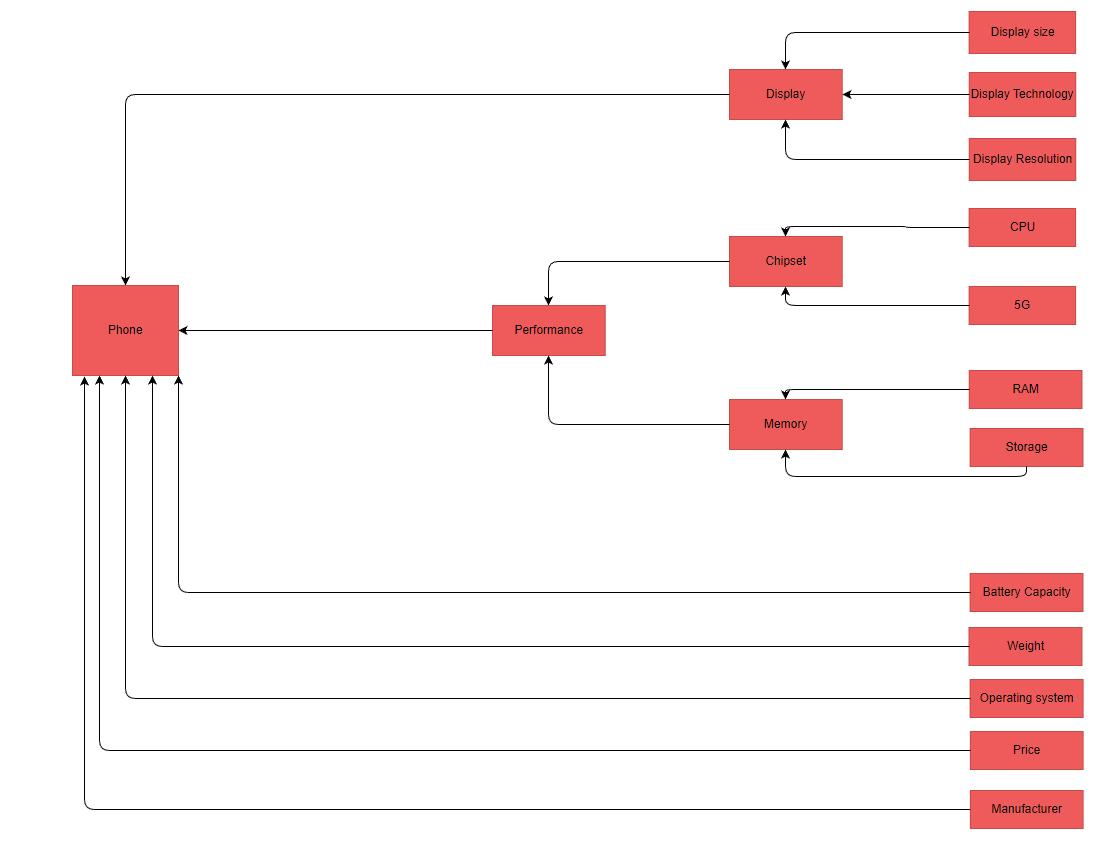

In [169]:
Image(filename='model.png')

Prej naštetim kriterijem in izpeljanim vozliščenm sen nato določil uteži (med 0 in 1), glede na svoje preference. To sem storil tako, da sem vsakemu kriteriju ročno določil vrednosti od listov proti korenu. Te vrednosti se nato morajo znotraj istega vozlišča sešteti v 1, prav tako se morajo vse dejanske uteži na koncu sešteti v 1.

In [170]:
# Display
disp_size=0.4
disp_tech=0.25
disp_res=0.35

# Chipset
cpu=0.7
frying5g=0.3

# Memory
ram=0.5
storage=0.5

chipset=0.55
memory=0.45

price=0.3
battery=0.2
os=0.2
performance=0.15
display=0.1
weight=0.025
manufacturer=0.025

real_weigths = {
    'manufacturer': manufacturer,
    'weight': weight,
    'display size': display * disp_size,
    'display technology': display * disp_tech,
    'display resolution': display * disp_res,
    'cpu': performance * chipset * cpu,
    'ram size': performance * memory * ram,
    'storage size': performance * memory * storage,
    'battery capacity': battery,
    'os': os,
    '5g': performance * chipset * frying5g,
    'price': price,
}


print("Weights:")
for item in real_weigths.items():
    print(item)

Weights:
('manufacturer', 0.025)
('weight', 0.025)
('display size', 0.04000000000000001)
('display technology', 0.025)
('display resolution', 0.034999999999999996)
('cpu', 0.057749999999999996)
('ram size', 0.03375)
('storage size', 0.03375)
('battery capacity', 0.2)
('os', 0.2)
('5g', 0.02475)
('price', 0.3)


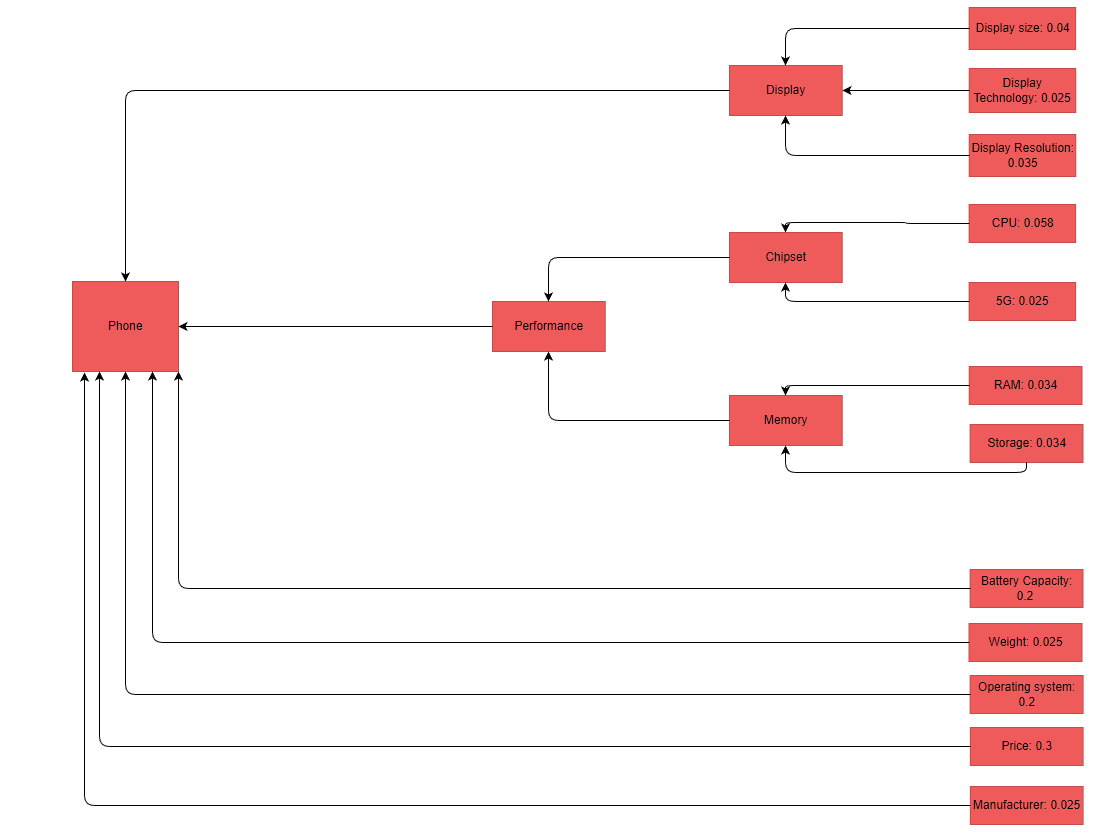

In [171]:
Image(filename='weighted_model.png')

Zelo pomembna sta mi kriterija cena, ker sem študent in kapaciteta baterije, ker sem zdoma v daljših intervalih in mnogokrat brez polnilca. Zelo pomemben kriterij mi je tudi operacijski sistem, saj močno preferiram Android OS. Na telefonu ne igram video iger zato mi sama zmogljivost ni tako pomembna, današnji telefoni pa imajo že zelo dobre zaslone, zato tudi tukaj nisem preveč zahteven.
Proizvajalec in teža telefona pa sta mi skoraj nepomembna.

### Manjvredne variante in ocena variant
#### Manjvredne variante

Preden lahko ocenim variante, moram odstraniti manjvredne variante. To so variante, ki jih model ne bi izbral nikoli. To sem storil tako, da sem pustil variante, ki so boljše v vsaj eni kategoriji od druge variante.

In [172]:
def remove_lesser(df):
    lesser_var = set()
    rows, tmp = df.shape
    for i in range(rows):
        for j in range(i + 1, rows):
            vec_delta = df.iloc[i, 1:] - df.iloc[j, 1:]
            if not(sum(vec_delta < 0) != 0 and sum(vec_delta > 0) != 0) and sum (vec_delta == 0):
                if sum(vec_delta) > 0:
                    lesser_var.add(df.index[j])
                else:
                    lesser_var.add(df.index[i])
    lesser_names = set()
    for var in lesser_var:
        lesser_names.add(df.iloc[var, 0])
        df = df.iloc[df.index != var, :]

    return df, lesser_names

data, lesser = remove_lesser(data)
print("Removed variants: ", lesser)

Removed variants:  set()


V podatkovni množici nisem imel nobene manjvredne variante.

### Ocene variant
Ko sem odstranil manjvredne variante, sem pričel z ocenjevanjem variant. Spisal sem funkcijo, ki izračuna oceno glede na koristnost in utež kriterijev. Ko sem funkcijo apliciral na podatkovni okvir sem tako dobil seznam variant z ocenami

In [173]:
def grade(element, weights):
    grade=0
    for key,value in element.items():
        grade += value * weights[key]
    return grade

grades=dict()
for var in data['phone name']:
    var_dict=dict()
    for col in data[data['phone name'] == var].columns[1:]:
        var_dict[col]=data[data['phone name'] == var][col].to_list()[0]
    grades[var]=grade(var_dict,real_weigths)

for key, value in sorted(grades.items(), key=lambda x:x[1], reverse=True):
    print(key, ': ',round(value,2))

Google Pixel 7 Pro :  75.91
Samsung Galaxy S22 Ultra 5G :  75.34
Google Pixel 7 :  74.4
OnePlus Nord :  73.14
Samsung Galaxy M22 :  72.62
Samsung Galaxy S22 5G :  70.9
OnePlus 10T :  70.78
Samsung Galaxy F12 :  69.27
Samsung Galaxy A11 :  66.39
Fairphone 4 :  58.79
Apple iPhone 14 :  55.81
Apple iPhone 14 Pro Max :  51.39
Huawei Mate 50 Pro :  39.98
LG Folder 2 :  31.96


Glede na moje uteži, je najboljši telefon Google Pixel 7 Pro, saj ima veliko baterijo, dober chipset, velik in kvaliteten ekran, ter Android operacijski sistem, kljuib temu pa je se vedno relativno ugoden. Zelo blizu (le 0.63 točke) mu je Samsung Galaxy S22 Ultra 5G, vendar mu zaradi moje preference proizvajalcev in višje cene ni uspelo priti na prvo mesto.

Za alternativno varianto bom izbral najcenejši telefon izmed najboljših štirih telefonov.

In [174]:
for key, value in sorted(grades.items(), key=lambda x:x[1], reverse=True)[:4]:
    print(key, '\n\tGrade: ',round(value,2),'\n\tPrice : ',df[df['phone name'] == key]\
    ['price'].to_list()[0],'€',sep='')

Google Pixel 7 Pro
	Grade: 75.91
	Price : 999€
Samsung Galaxy S22 Ultra 5G
	Grade: 75.34
	Price : 1100€
Google Pixel 7
	Grade: 74.4
	Price : 750€
OnePlus Nord
	Grade: 73.14
	Price : 340€


Za alternativno varianto sem tako izbral OnePlus Nord, saj je kar za 659 € cenejši od najboljšega telefona, kar mi kot študentu veliko pomeni.

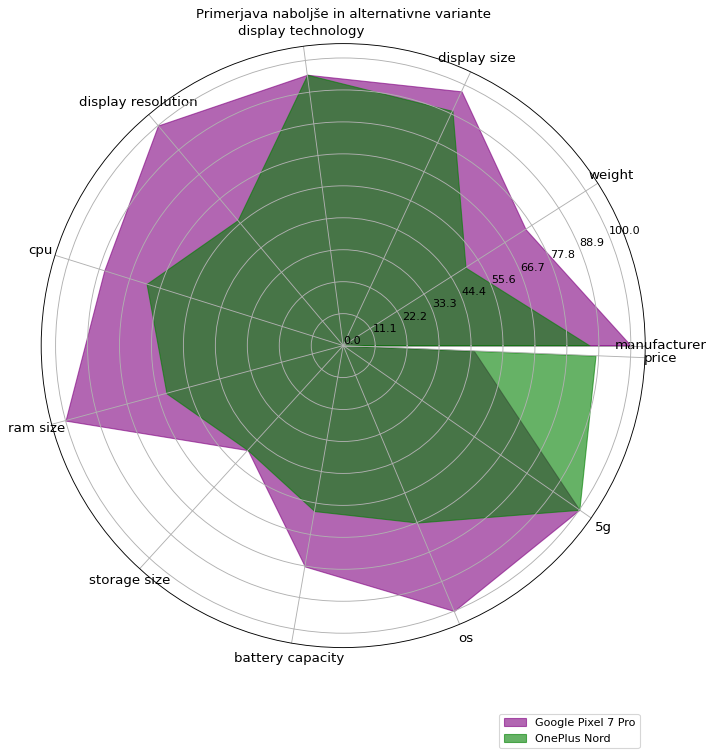

In [175]:
bs, al = dict(), dict()
theta = np.linspace(0, 2 * np.pi - 0.04, len(data.columns[1:]))

best = data.loc[data['phone name'] == 'Google Pixel 7 Pro']
alt = data.loc[data['phone name'] == 'OnePlus Nord']

for i in data.columns[1:]:
    bs[i] = data[data['phone name'] == 'Google Pixel 7 Pro'][i].to_list()[0]
    al[i] = data[data['phone name'] == 'OnePlus Nord'][i].to_list()[0]

fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111, projection='polar')
ax.set_title("Primerjava naboljše in alternativne variante")
ax.set_xticks(theta)
ax.set_rticks(np.linspace(0, 100, 10))
ax.set_xticklabels(data.columns[1:], size=12)

ax.fill_between(theta, np.array([v for v in bs.values()], dtype=float),\
 0, label='Google Pixel 7 Pro', alpha = 0.6, color="purple")
ax.fill_between(theta, np.array([v for v in al.values()], dtype=float),\
 0, label='OnePlus Nord', alpha = 0.6, color="green")
ax.legend(bbox_to_anchor=(1, -0.1))

plt.show()

Opažam, da je OnePlus Nord slabši skoraj pri vseh kriterijih (pri 3 je izenačen, nikjer boljši), vendar če upoštevam še razliko v ceni opažam, da je zelo konkurenčen in se zato uvršča na četrto mesto.

### Primerjava variant
#### Primerjava dveh najdražjih variant z najboljšo
Ta prikaz se mi zdi zanimiv, saj me zanima kakšne so razlike v specifikacijah telefonov, poleg cene.

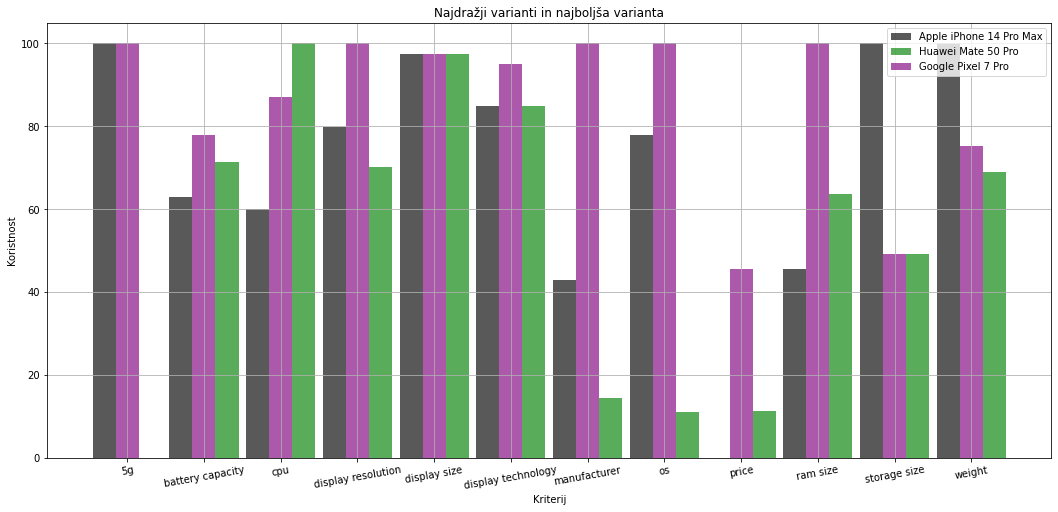

In [176]:
ex = data.sort_values(by=["price"]).iloc[0,:]
e2x = data.sort_values(by=["price"]).iloc[1,:]

ex_dict = dict()
e2x_dict = dict()

for column in data.columns[1:]:
    ex_dict[column] = ex[column]
    e2x_dict[column] = e2x[column]

x1, y1 = zip(*(sorted(ex_dict.items())))
x2, y2 = zip(*(sorted(e2x_dict.items())))
x3, y3 = zip(*(sorted(bs.items())))

fig, ax = plt.subplots(figsize=(18,8))
plt.grid()
plt.xticks(rotation=10)
ax.set_title('Najdražji varianti in najboljša varianta')
ax.set_ylabel('Koristnost')
ax.set_xlabel('Kriterij')

X_axis = np.arange(len(data.columns[1:]))
plt.xticks(X_axis, x1)

ax.bar(X_axis - 0.3, y1, 0.3,label='Apple iPhone 14 Pro Max', alpha=0.65, color='black')
ax.bar(X_axis + 0.3, y2, 0.3, label='Huawei Mate 50 Pro', alpha=0.65, color='green')
ax.bar(X_axis, y3, 0.3, label='Google Pixel 7 Pro', alpha=0.65, color='purple')

ax.legend(loc=1)
plt.show()

Opažam da, Huawei Mate 50 Pro, kljub visoki ceni nima 5G tehnologije, ima manjšo kapaciteto baterije, slabšo resolucijo ekrana in manj RAMa v primerjavi z najboljšim telefonom. Poleg tega ima zelo slabo oceno pri kriterijih proizvajalec in operacijski sistem zaradi mojih preferenc.

Pri Apple IPhone 14 Pro Max opazim, da je skoraj v vseh kriterijih slabši kot najboljši telefon. Iz tega ugotavljam, da za več denarja dobimo slabše specifikacije telefona. Prav tako ima kot Huawei zelo slabo oceno pri kriterijih proizvajalec in operacijski sistem zaradi mojih preferenc.

### Analiza
#### Map diagram
Map diagram nam vizualizira odločitvene modele na podalgi dveh izbranih kriterijev. Kriterija ki sem ju izbral sta zmogljivost oz. performance (izpeljan kriterij), ter cena.

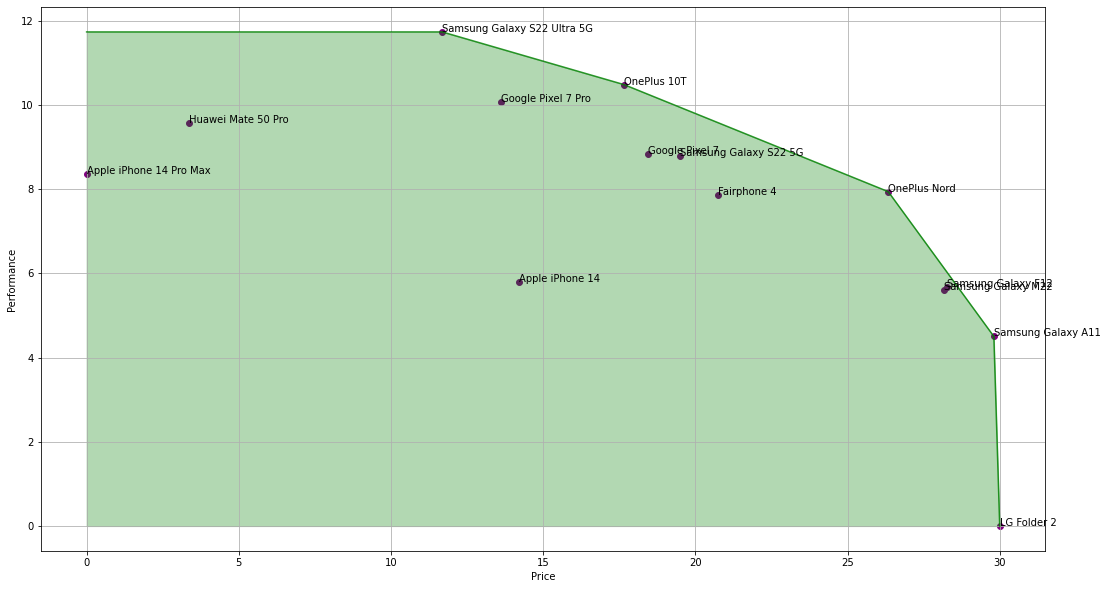

In [177]:
def map_score(var : dict, weights : dict):
    grade_pric = 0
    grade_perf = 0
    selected_weights=['ram size', 'cpu', 'ram size', 'storage size']

    for k, v in var.items():
        if k in ['price']:
            grade_pric += v * weights['price']
        elif k in selected_weights:
            grade_perf += v * weights[k]
            
    return grade_pric, grade_perf

map_grades = dict()
for var in data['phone name']:
    var_dict = dict()
    for column in data[data['phone name'] == var].columns[1:]:
        var_dict[column] = data[data['phone name'] == var][column].to_list()[0]
    map_grades[var] = map_score(var_dict, real_weigths)

price = {k: v[0] for k, v in map_grades.items()}
performance = {k: v[1] for k, v in map_grades.items()}


ax.set_title('Zmogljivost in cena')
fig, ax = plt.subplots(figsize=(18,10))
plt.grid()

# Display the values as scatter plot.
ax.scatter(price.values(), performance.values(), color="purple", s=35)
ax.set_xlabel('Price')
ax.set_ylabel('Performance')

line = []


for name in sorted(price.keys(), key=price.get):

    if name == 'Samsung Galaxy S22 Ultra 5G':
        line.append((0, performance[name]))
        line.append((price[name], performance[name]))
    if name in ['OnePlus 10T', 'OnePlus Nord', 'Samsung Galaxy A11', 'LG Folder 2']:
        line.append((price[name], performance[name]))
    ax.annotate('%s'%name, xy=(price[name], performance[name]), textcoords='data')

ax.plot([x for x, _ in line], [y for _, y in line], color='green', alpha=0.8)
ax.fill_between([x for x, _ in line], [y for _, y in line], 0, color='green', alpha=0.3)
plt.show()

Ovojnico napenjajo variante:
- Samsung Galaxy S22 Ultra 5G
- Oneplus 10T
- OnePlus Nord
- Samsung Galaxy A11
- LG Folder 2

Opažam da imajo telefoni znamk Samsung in Oneplus najboljše razmerje med ceno in zmogljivostjo, najslabšo pa telefoni znamke Apple.


### Občutljivost modela

In [178]:
# reset variable names to weigths
# Display
disp_size=0.4
disp_tech=0.25
disp_res=0.35

# Chipset
cpu=0.7
frying5g=0.3

# Memory
ram=0.5
storage=0.5

chipset=0.55
memory=0.45

price=0.3
battery=0.2
os=0.2
performance=0.15
display=0.1
weight=0.025
manufacturer=0.025

In [179]:
var_mem_weights = np.linspace(0, 1, 50)
prev_best = ''
chg_counter = 0
chg_weight_limits = []
var_grades = dict()
winners = []

for mem_weight in var_mem_weights:
    var_chipset_weight = 1 - mem_weight
    sensitivity_weigths = {
        'display size': display * disp_size,
        'display technology': display * disp_tech,
        'display resolution': display * disp_res,
        'cpu': performance * var_chipset_weight * cpu,
        'ram size': performance * mem_weight * ram,
        'storage size': performance * mem_weight * storage,
        '5g': performance * var_chipset_weight * frying5g,
        'battery capacity': battery,
        'os': os,
        'manufacturer': manufacturer,
        'weight': weight,
        'price': price,
    }   
    
    best_var = -1
    best_util = -1 
    for var in data['phone name']:
        var_dict=dict()
        for col in data[data['phone name'] == var].columns[1:]:
            var_dict[col]=data[data['phone name'] == var][col].to_list()[0]

        utility = grade(var_dict, sensitivity_weigths)
    
        if best_util < utility:
            best_util = utility
            best_var = var
            
        if var in var_grades:
            var_grades[var].append((mem_weight, utility))
        else:
            var_grades[var] = [(mem_weight, utility)]
            
            
    if prev_best != best_var or prev_best == '':
        prev_best = best_var
        winners.append(best_var)
        chg_counter += 1
        chg_weight_limits.append(mem_weight)

print('Number of different winners:', chg_counter)
for winner, limit in zip(winners,chg_weight_limits):
    print('\t winner: ', winner,' at threshold ',round(limit,4),sep='')

Number of different winners: 2
	 winner: Google Pixel 7 Pro at threshold 0.0
	 winner: Samsung Galaxy S22 Ultra 5G at threshold 0.6122


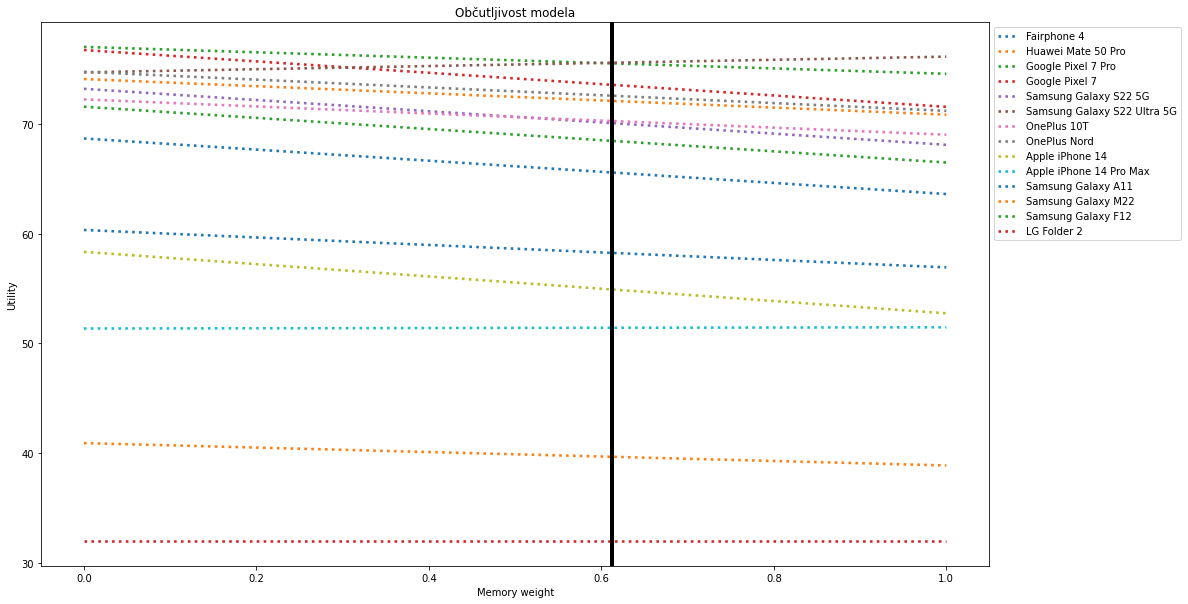

In [180]:
fig, ax = plt.subplots(figsize=(17,10))

ax.set_xlabel('Memory weight')
ax.set_ylabel('Utility')
ax.set_title('Občutljivost modela')

for var in var_grades:
    x = [x for x, _ in var_grades[var]]
    y = [y for _, y in var_grades[var]]
    ax.plot(x, y, linewidth=2.6, linestyle='dotted', label=var)
    
    for x in chg_weight_limits[1:]:
        ax.axvline(x, color='k', linestyle='-', linewidth=4, alpha=0.7)

ax.legend(bbox_to_anchor=(1, 1))

plt.show()

Opazimo lahko da se zmagovalec spremeni, če je utež večja od 0.62. Večjih sprememb ni namreč, če ima telefon mnogo slabši spomin, to pomeni, da so tudi ostale specifikacije telefona slabše.

### Kaj-če analiza


Ker sta bila telefona Google Pixel 7 Pro in Samsung Galaxy S22 Ultra 5G, le 0.63 točke narazen se bom v tem poglavju vprašal kolikšen popust bi moral imeti Samsung Galaxy S22 Ultra 5G, da bi ga model izbral za najboljšega. 

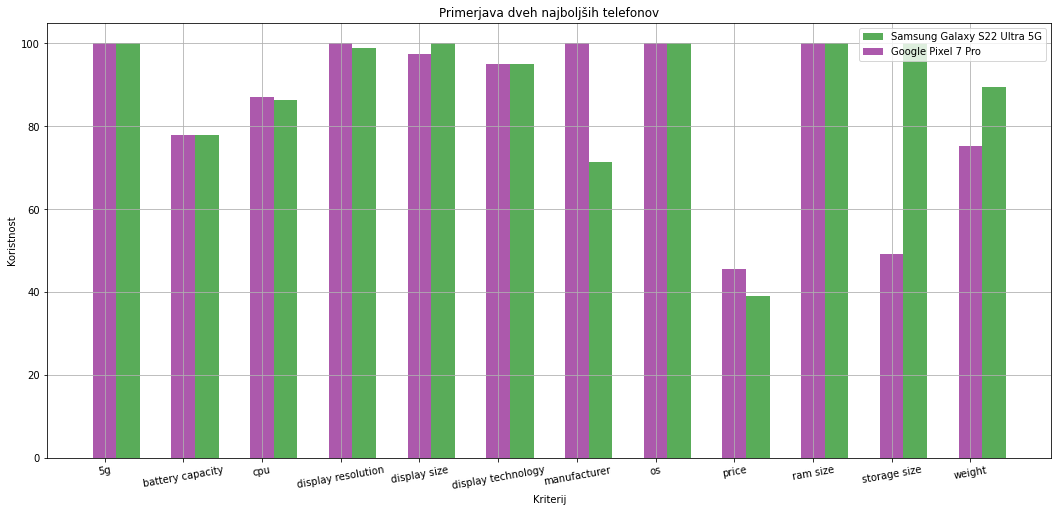

In [181]:
best = data.loc[data['phone name'] == 'Google Pixel 7 Pro']
alt = data.loc[data['phone name'] == 'Samsung Galaxy S22 Ultra 5G']

ex_dict = dict()
e2x_dict = dict()

for i in data.columns[1:]:
    bs[i] = data[data['phone name'] == 'Google Pixel 7 Pro'][i].to_list()[0]
    al[i] = data[data['phone name'] == 'Samsung Galaxy S22 Ultra 5G'][i].to_list()[0]
    
x2, y2 = zip(*(sorted(al.items())))
x3, y3 = zip(*(sorted(bs.items())))

fig, ax = plt.subplots(figsize=(18,8))
plt.grid()
plt.xticks(rotation=10)
ax.set_title('Primerjava dveh najboljših telefonov')
ax.set_ylabel('Koristnost')
ax.set_xlabel('Kriterij')

X_axis = np.arange(len(data.columns[1:]))
plt.xticks(X_axis, x2)
ax.bar(X_axis + 0.3, y2, 0.3, label='Samsung Galaxy S22 Ultra 5G', alpha=0.65, color='green')
ax.bar(X_axis, y3, 0.3, label='Google Pixel 7 Pro', alpha=0.65, color='purple')

ax.legend(loc=1)
plt.show()

Kot opažam sta telefona zelo konkurenčna pri kriterijih izpeljanega vozlišča Display in pri kriterijih izpeljanega vozlišča chipset. Prav tako imata najboljši operacijski sistem in enako kapaciteto baterije. Telefon Samsung Galaxy S22 Ultra 5G je rahlo dražji, vendar ima mnogo boljši rezultat pri kriteriju storage size.

In [182]:
best = df.loc[df['phone name'] == 'Google Pixel 7 Pro'].copy()
alt = df.loc[df['phone name'] == 'Samsung Galaxy S22 Ultra 5G'].copy()

best_grade = 75.91
price_diff=np.linspace(alt['price'].to_list()[0], 0, 50)
for price in price_diff:
    alt_ch = data.loc[data['phone name'] == 'Samsung Galaxy S22 Ultra 5G'].copy()
    alt_ch['price']= price
    alt_ch['price'] = alt_ch['price'].apply(n_price)

    var_dict = dict()
    for col in alt_ch.columns[1:]:
        var_dict[col] = alt_ch[col].to_list()[0]
    alt_grade=grade(var_dict, real_weigths)
    if alt_grade > best_grade:
        actual_price = df[df['phone name'] == 'Samsung Galaxy S22 Ultra 5G']['price'].to_list()[0]
        price_diff= actual_price - price
        per_diff = price_diff / (actual_price + price / 2) * 100
        print("Samsung Galaxy S22 Ultra 5G:\n\tScore: ",round(alt_grade,2),\
        '\n\tActual price: ',round(price), 
        ' €\n\tChange in price: ',round(price_diff,2), \
        ' €\n\tDifference in %: ',round(per_diff,2),sep='')
        
        break


Samsung Galaxy S22 Ultra 5G:
	Score: 76.21
	Actual price: 1055 €
	Change in price: 44.9 €
	Difference in %: 2.76


Ugotavljam, da bi morala cena telefonu Samsung Galaxy S22 Ultra 5G pasti za zgolj 2.8 % da bi ga model izbral kot najboljši telefon. Torej če bi uspel poiskati telefon pri drugemu prodajalcu ali ujel akcijo, bi se mi nakup izplačal. To potrjuje moje ugotovitve, da sta telefona izjemno konkurenčna.